# <p align="center">Siemens Sales Forecast</p>

---

## <p align="center">*1 - Exploratory Data Analysis & Pre-processing*</p>

---

### 👥 **Team Members**
- **Ana Farinha** *(Student Number: 20211514)*  
- **António Oliveira** *(Student Number: 20211595)*  
- **Mariana Neto** *(Student Number: 20211527)*  
- **Salvador Domingues** *(Student Number: 20240597)*  

📅 **Date:** *April 1, 2025*  
📍 **Prepared for:** *Siemens*  

**GitHub Repo:** https://github.com/MGN19/Siemens-forecast

---

# ToC

<a class="anchor" id="top"></a>


1. [Import Libraries & Data](#1.-Import-Libraries-&-Data) <br><br>

2. [Data Wrangling](#2.-Data-Wrangling) <br>

    2.1 [Sales Data](#2.1-Sales-Data) <br>
    
    2.2 [Market Data](#2.2-Market-Data) <br><br>

3. [Data Exploration](#3.-Data-Exploration) <br><br>

4. [Feature Exploration](#4.-Feature-Exploration) <br><br>

5. [Data Cleaning & Preprocessing](#5.-Data-Cleaning-&-Preprocessing) <br><br>
    5.1 [Duplicates](#5.1-Duplicates) <br>
    
    5.2 [Missing Values](#5.2-Missing-Values) <br>

In [1]:
## CELL TYPES (remover depois)

<div class="alert-danger">
    
test

<div class="alert-warning">
    
test

<div class="alert-info">
    
test

# 1. Import Libraries & Data

In [2]:
import pandas as pd

from ydata_profiling import ProfileReport

import functions as f

import utils as u

import missingno as msno


# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")


pd.set_option('display.max_columns', None)

**Data**

In [3]:
test = pd.read_csv('data/Case2_Test Set Template.csv', 
                 sep = ';')

sales_data = pd.read_csv('./data/Case2_Sales data.csv', 
                 sep = ';')

market_data = pd.read_excel('./data/Case2_Market data.xlsx', 
                            index_col = 'Unnamed: 0')


# 2. Data Wrangling

<a href="#top">Top &#129033;</a>

- make necessarry changes to datasets to make them usable

## 2.1 Sales Data


In [4]:
sales_data.head(2)

,DATE,Mapped_GCK,Sales_EUR
0,01.10.2018,#1,0
1,02.10.2018,#1,0


**Exploring the dataset structure with .info() method**

The `.info()` method provides more information about the dataset, including the existence of missing values and the data type of the elements of each row.

In [5]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DATE        9802 non-null   object
 1   Mapped_GCK  9802 non-null   object
 2   Sales_EUR   9802 non-null   object
dtypes: object(3)
memory usage: 229.9+ KB


With the information above, we can see the following:
- all of the columns in this dataset are categorical variables. For analysis purposes, the `DATE` column will be transformed into a date format, and the `Sales_EUR` column into a float. 
- we can also see that there might not be any missing values in any of the columns of the dataset.

Based on this, we will first change the data types of these 2 columns identified so that analysis can be proprerly made.

In [6]:
# convert to datetime
sales_data['DATE'] = pd.to_datetime(sales_data['DATE'], 
                                    format='%d.%m.%Y')

# convvert to numbers
sales_data['Sales_EUR'] = sales_data['Sales_EUR'].apply(lambda x: x.replace(',', '.')).astype(float)

sales_data.head(1)

,DATE,Mapped_GCK,Sales_EUR
0,2018-10-01,#1,0.0


**Convert to Monthly Data**

In [7]:
# convert to montlhy sales
sales_data["Date"] = sales_data["DATE"].dt.to_period("M")
monthly_sales = sales_data.groupby(["Date", 
                                     "Mapped_GCK"]).agg({"Sales_EUR": "sum"}).reset_index()

monthly_sales.head(7)

,Date,Mapped_GCK,Sales_EUR
0,2018-10,#1,36098918.79
1,2018-10,#11,1021303.50
2,2018-10,#12,28686.33
3,2018-10,#13,27666.10
4,2018-10,#14,5770.00
5,2018-10,#16,333196.87
6,2018-10,#20,4563.14


Make each Product categ a column

In [8]:
pivoted_data = monthly_sales.pivot(index='Date', 
                                 columns='Mapped_GCK', 
                                 values='Sales_EUR')

pivoted_data.head(3)

Mapped_GCK,#1,#11,#12,#13,#14,#16,#20,#3,#36,#4,#5,#6,#8,#9
Date,,,,,,,,,,,,,,
2018-10,36098918.79,1021303.5,28686.33,27666.10,5770.0,333196.87,4563.14,8089465.96,6474.60,397760.69,2499061.19,369231.60,586052.74,3219.32
2018-11,5140760.00,1898844.8,1070.00,68180.00,17130.0,1377694.32,5798.14,11863001.51,21617.61,371322.42,8993944.04,473046.96,526292.77,1875.90
2018-12,37889612.12,1226122.0,17880.60,15655.18,0.0,4762524.66,918.65,8736859.39,13924.52,430100.96,6947507.31,999472.69,271490.71,0.00


<div class="alert-danger">

Se calhar dar rename às colunas

## 2.2 Market Data

<a href="#top">Top &#129033;</a>

In [9]:
market_data.head(3)

,China,China.1,France,France.1,Germany,Germany.1,Italy,Italy.1,Japan,Japan.1,Switzerland,Switzerland.1,United Kingdom,United Kingdom.1,United States,United States.1,Europe,Europe.1,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Producer Prices,Producer Prices.1,Producer Prices.2,Producer Prices.3,Producer Prices.4,Producer Prices.5,production index,production index.1,production index.2,production index.3,production index.4,production index.5,production index.6,production index.7,production index.8,production index.9,production index.10,production index.11,production index.12,production index.13,production index.14,production index.15
Index 2010=100 (if not otherwise noted),Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,World: Price of Base Metals,World: Price of Energy,World: Price of Metals & Minerals,World: Price of Natural gas index,"World: Price of Crude oil, average",World: Price of Copper,United States: EUR in LCU,United States: Electrical equipment,United Kingdom: Electrical equipment,Italy: Electrical equipment,France: Electrical equipment,Germany: Electrical equipment,China: Electrical equipment,United States: Machinery and equipment n.e.c.,World: Machinery and equipment n.e.c.,Switzerland: Machinery and equipment n.e.c.,United Kingdom: Machinery and equipment n.e.c.,Italy: Machinery and equipment n.e.c.,Japan: Machinery and equipment n.e.c.,France: Machinery and equipment n.e.c.,Germany: Machinery and equipment n.e.c.,United States: Electrical equipment,World: Electrical equipment,Switzerland: Electrical equipment,United Kingdom: Electrical equipment,Italy: Electrical equipment,Japan: Electrical equipment,France: Electrical equipment,Germany: Electrical equipment
date,MAB_ELE_PRO156,MAB_ELE_SHP156,MAB_ELE_PRO250,MAB_ELE_SHP250,MAB_ELE_PRO276,MAB_ELE_SHP276,MAB_ELE_PRO380,MAB_ELE_SHP380,MAB_ELE_PRO392,MAB_ELE_SHP392,MAB_ELE_PRO756,MAB_ELE_SHP756,MAB_ELE_PRO826,MAB_ELE_SHP826,MAB_ELE_PRO840,MAB_ELE_SHP840,MAB_ELE_PRO1100,MAB_ELE_SHP1100,RohiBASEMET1000_org,RohiENERGY1000_org,RohiMETMIN1000_org,RohiNATGAS1000_org,RohCRUDE_PETRO1000_org,RohCOPPER1000_org,WKLWEUR840_org,PRI27840_org,PRI27826_org,PRI27380_org,PRI27250_org,PRI27276_org,PRI27156_org,PRO28840_org,PRO281000_org,PRO28756_org,PRO28826_org,PRO28380_org,PRO28392_org,PRO28250_org,PRO28276_org,PRO27840_org,PRO271000_org,PRO27756_org,PRO27826_org,PRO27380_org,PRO27392_org,PRO27250_org,PRO27276_org
2004m2,16.940704,16.940704,112.091273,83.458866,82.623037,79.452532,124.289603,86.560493,109.33401,110.495272,91.221862,89.987275,111.353812,73.601265,107.6014,79.24023,97.122911,80.09853,54.039811,44.123338,48.747945,87.076974,39.639458,36.623832,1.2646,78.969864,80.757423,93.020027,NaN,93.230453,NaN,102.491722,97.597374,97.1,106.191977,116.790276,110.890034,118.274109,80.82901,117.723991,NaN,81.1,120.706516,141.510864,106.161262,102.077057,85.9132


In [10]:
info = market_data.T.iloc[:, :2]
info

,Index 2010=100 (if not otherwise noted),date
China,Production Index Machinery & Electricals,MAB_ELE_PRO156
China.1,Shipments Index Machinery & Electricals,MAB_ELE_SHP156
France,Production Index Machinery & Electricals,MAB_ELE_PRO250
France.1,Shipments Index Machinery & Electricals,MAB_ELE_SHP250
Germany,Production Index Machinery & Electricals,MAB_ELE_PRO276
Germany.1,Shipments Index Machinery & Electricals,MAB_ELE_SHP276
Italy,Production Index Machinery & Electricals,MAB_ELE_PRO380
Italy.1,Shipments Index Machinery & Electricals,MAB_ELE_SHP380
Japan,Production Index Machinery & Electricals,MAB_ELE_PRO392
Japan.1,Shipments Index Machinery & Electricals,MAB_ELE_SHP392


Rename Cols

In [11]:
market_data = market_data.rename(columns = u.rename_dict)

Remove unnecessary rows

In [12]:
market_data = market_data.reset_index()
market_data = market_data[2:]
market_data.rename(columns={'index': 'Date'}, inplace=True)
market_data

,Date,CHI Production Index,CHI Shipments Index,FRA Production Index,FRA Shipments Index,GER Production Index,GER Shipments Index,ITA Production Index,ITA Shipments Index,JAP Production Index,JAP Shipments Index,SWI Production Index,SWI Shipments Index,UK Production Index,UK Shipments Index,USA Production Index,USA Shipments Index,Europe Production Index,Europe Shipments Index,(W) Price of Base Metals,(W) Price of Energy,(W) Price of Metals & Minerals,(W) Price of Natural gas index,"(W) Price of Crude oil, average",(W) Price of Copper,USA EUR to LCU Conversion Rate,USA EE Production Prices,UK EE Production Prices,ITA EE Production Prices,FRA EE Production Prices,GER EE Production Prices,CHI EE Production Prices,USA Machinery & Equipment Index,(W) Machinery & Equipment Index,SWI Machinery & Equipment Index,UK Machinery & Equipment Index,ITA Machinery & Equipment Index,JAP Machinery & Equipment Index,FRA Machinery & Equipment Index,GER Machinery & Equipment Index,USA EE Production Index,(W) EE Production Index,SWI EE Production Index,UK EE Production Index,ITA EE Production Index,JAP EE Production Index,FRA EE Production Index,GER EE Production Index
2,2004m2,16.940704,16.940704,112.091273,83.458866,82.623037,79.452532,124.289603,86.560493,109.33401,110.495272,91.221862,89.987275,111.353812,73.601265,107.6014,79.24023,97.122911,80.09853,54.039811,44.123338,48.747945,87.076974,39.639458,36.623832,1.2646,78.969864,80.757423,93.020027,NaN,93.230453,NaN,102.491722,97.597374,97.1,106.191977,116.790276,110.890034,118.274109,80.82901,117.723991,NaN,81.1,120.706516,141.510864,106.161262,102.077057,85.9132
3,2004m3,23.711852,23.711852,136.327976,106.168192,100.556582,97.012918,143.411662,106.344544,140.884616,144.686166,85.866287,79.883583,127.558608,84.047595,110.187364,98.619024,113.783904,96.015929,54.666162,47.588957,49.256157,87.192705,42.592034,39.931055,1.2262,79.673569,80.962135,93.540268,NaN,93.335678,NaN,105.62748,113.224892,91.195116,121.625075,139.288391,141.176853,148.121841,102.130104,119.220779,NaN,76.690307,138.30955,152.880234,140.288741,117.225685,97.670815
4,2004m4,24.435235,24.435235,117.791806,92.007646,89.653203,84.932358,129.083828,95.579673,105.853579,102.655769,85.622508,79.740802,108.732297,73.026027,108.166564,89.774031,101.715199,85.167236,54.872715,47.779013,49.423751,91.379923,42.650637,39.134854,1.1985,80.337639,80.757423,93.852425,NaN,93.440903,NaN,103.484955,100.16909,93.793535,104.965505,125.289566,105.648765,125.482231,90.961426,117.441124,NaN,71.552403,115.55733,137.796875,106.271197,105.335777,87.253983
5,2004m5,23.708115,23.708115,109.002541,85.696486,86.880571,82.372794,135.590391,100.087039,101.864777,100.305285,85.378729,79.598021,110.6452,74.591883,108.425887,87.463813,101.275727,84.485767,51.230356,53.590898,46.468392,99.04452,47.517121,36.278433,1.2007,80.798828,80.757423,93.852425,NaN,93.546127,NaN,103.643944,99.581436,96.391954,105.885359,131.988998,101.990361,116.64975,88.082901,117.899216,NaN,66.4145,119.269534,143.860535,101.60871,96.616508,84.675552
6,2004m6,27.009138,27.009138,133.785737,106.641482,99.010814,95.10874,136.424935,110.889719,120.33292,119.61638,85.13495,79.455239,122.02096,82.343346,110.569933,97.364496,112.057197,96.963294,52.876331,50.799575,47.803913,98.636267,44.967605,35.65738,1.2138,80.91349,80.552711,93.956467,NaN,93.440903,NaN,106.062668,109.27771,98.990373,118.252278,132.988922,122.136575,143.248734,100.978699,119.499107,NaN,61.276596,128.849416,144.315308,116.655248,118.45871,95.401802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,2021m12,310.763183,310.763183,100.565744,134.589504,118.103281,149.364286,94.006826,150.482735,127.771735,131.029703,106.704029,104.819189,101.273544,NaN,107.040766,148.590371,123.076659,150.046922,125.20703,112.372958,116.715183,236.488368,92.188708,126.76124,1.1304,128.511261,NaN,113.3

Convert dates to datetime

In [13]:
# convert to datetime
market_data["Year"] = market_data["Date"].str.extract(r"(\d{4})").astype(int)
market_data["Month"] = market_data["Date"].str.extract(r"m(\d{1,2})").astype(int)

market_data["Date"] = pd.to_datetime(market_data["Year"].astype(str) + "-" + market_data["Month"].astype(str), format="%Y-%m").dt.to_period("M")

market_data.drop(['Year', 'Month'], axis = 1, inplace = True)

Convert numbers to float

In [14]:
for column in market_data.columns:
    if column in ['Date', 'Month', 'Year']:
        continue
    else:
        market_data[column] = market_data[column].astype(str).str.replace(',', '.', regex=False)
        market_data[column] = pd.to_numeric(market_data[column], errors='coerce')

In [15]:
market_data.set_index('Date', inplace=True)

In [16]:
market_data.head(4)

,CHI Production Index,CHI Shipments Index,FRA Production Index,FRA Shipments Index,GER Production Index,GER Shipments Index,ITA Production Index,ITA Shipments Index,JAP Production Index,JAP Shipments Index,SWI Production Index,SWI Shipments Index,UK Production Index,UK Shipments Index,USA Production Index,USA Shipments Index,Europe Production Index,Europe Shipments Index,(W) Price of Base Metals,(W) Price of Energy,(W) Price of Metals & Minerals,(W) Price of Natural gas index,"(W) Price of Crude oil, average",(W) Price of Copper,USA EUR to LCU Conversion Rate,USA EE Production Prices,UK EE Production Prices,ITA EE Production Prices,FRA EE Production Prices,GER EE Production Prices,CHI EE Production Prices,USA Machinery & Equipment Index,(W) Machinery & Equipment Index,SWI Machinery & Equipment Index,UK Machinery & Equipment Index,ITA Machinery & Equipment Index,JAP Machinery & Equipment Index,FRA Machinery & Equipment Index,GER Machinery & Equipment Index,USA EE Production Index,(W) EE Production Index,SWI EE Production Index,UK EE Production Index,ITA EE Production Index,JAP EE Production Index,FRA EE Production Index,GER EE Production Index
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-02,16.940704,16.940704,112.091273,83.458866,82.623037,79.452532,124.289603,86.560493,109.334010,110.495272,91.221862,89.987275,111.353812,73.601265,107.601400,79.240230,97.122911,80.098530,54.039811,44.123338,48.747945,87.076974,39.639458,36.623832,1.2646,78.969864,80.757423,93.020027,NaN,93.230453,NaN,102.491722,97.597374,97.100000,106.191977,116.790276,110.890034,118.274109,80.829010,117.723991,NaN,81.100000,120.706516,141.510864,106.161262,102.077057,85.913200
2004-03,23.711852,23.711852,136.327976,106.168192,100.556582,97.012918,143.411662,106.344544,140.884616,144.686166,85.866287,79.883583,127.558608,84.047595,110.187364,98.619024,113.783904,96.015929,54.666162,47.588957,49.256157,87.192705,42.592034,39.931055,1.2262,79.673569,80.962135,93.540268,NaN,93.335678,NaN,105.627480,113.224892,91.195116,121.625075,139.288391,141.176853,148.121841,102.130104,119.220779,NaN,76.690307,138.309550,152.880234,140.288741,117.225685,97.670815
2004-04,24.435235,24.435235,117.791806,92.007646,89.653203,84.932358,129.083828,95.579673,105.853579,102.655769,85.622508,79.740802,108.732297,73.026027,108.166564,89.774031,101.715199,85.167236,54.872715,47.779013,49.423751,91.379923,42.650637,39.134854,1.1985,80.337639,80.757423,93.852425,NaN,93.440903,NaN,103.484955,100.169090,93.793535,104.965505,125.289566,105.648765,125.482231,90.961426,117.441124,NaN,71.552403,115.557330,137.796875,106.271197,105.335777,87.253983
2004-05,23.708115,23.708115,109.002541,85.696486,86.880571,82.372794,135.590391,100.087039,101.864777,100.305285,85.378729,79.598021,110.645200,74.591883,108.425887,87.463813,101.275727,84.485767,51.230356,53.590898,46.468392,99.044520,47.517121,36.278433,1.2007,80.798828,80.757423,93.852425,NaN,93.546127,NaN,103.643944,99.581436,96.391954,105.885359,131.988998,101.990361,116.649750,88.082901,117.899216,NaN,66.414500,119.269534,143.860535,101.608710,96.616508,84.675552


# 3. Data Exploration

<a href="#top">Top &#129033;</a>

### Initial Sales Data Exploration

In [17]:
# profile = ProfileReport(
#     pivoted_data, 
#     title='Data',
#     correlations={
#         "pearson": {"calculate": True},
#         "spearman": {"calculate": False},
#         "kendall": {"calculate": False},
#         "phi_k": {"calculate": False},
#         "cramers": {"calculate": False},
#     },
# )

# profile

- #11 is highly overall correlated with #8	
- #12 is highly overall correlated with #3 and 1 other fields	
- #3 is highly overall correlated with #12 and 1 other fields	
- #5 is highly overall correlated with #3	
- #8 is highly overall correlated with #11 and 2 other fields

<br>

**Statistics**

By using the `describe()` method we get different statistical measurements, such as mean and standard deviation, for the various features. We will include the parameter 'all' so both statistics for numerical and categorical data appear. 

In [18]:
pivoted_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Mapped_GCK,,,,,,,,
#1,43.0,3.591177e+07,5.905117e+06,5140760.00,3.440896e+07,37323903.07,3.888867e+07,44483013.86
#11,43.0,1.532589e+06,9.811598e+05,18200.00,9.035992e+05,1226122.00,2.161184e+06,3891447.76
#12,43.0,1.925462e+05,1.410168e+05,1070.00,3.923521e+04,172712.88,3.217950e+05,445648.06
#13,43.0,2.346877e+04,1.614016e+04,2550.31,1.046647e+04,20663.64,3.096641e+04,68180.00
#14,43.0,1.148423e+04,1.611617e+04,-2851.45,2.015025e+03,5951.85,1.530589e+04,76161.44
#16,43.0,4.277018e+05,7.824899e+05,40360.08,1.375541e+05,224501.90,3.283725e+05,4762524.66
#20,43.0,1.821555e+03,2.307900e+03,0.00,3.308100e+02,842.93,2.543020e+03,8485.60
#3,43.0,1.240566e+07,2.577332e+06,3804319.74,1.105907e+07,12317479.75,1.377567e+07,18686819.85
#36,43.0,2.322358e+04,4.265128e+04,674.00,6.244495e+03,12377.77,2.199505e+04,253519.04


- negative sales values #14, #6, #9

### Initial Market Data Exporation

In [19]:
# profile2 = ProfileReport(
#     market_data, 
#     title='Data',
#     correlations={
#         "pearson": {"calculate": True},
#         "spearman": {"calculate": False},
#         "kendall": {"calculate": False},
#         "phi_k": {"calculate": False},
#         "cramers": {"calculate": False},
#     },
# )

# profile2

In [20]:
market_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 219 entries, 2004-02 to 2022-04
Freq: M
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CHI Production Index             219 non-null    float64
 1   CHI Shipments Index              219 non-null    float64
 2   FRA Production Index             219 non-null    float64
 3   FRA Shipments Index              219 non-null    float64
 4   GER Production Index             219 non-null    float64
 5   GER Shipments Index              219 non-null    float64
 6   ITA Production Index             219 non-null    float64
 7   ITA Shipments Index              219 non-null    float64
 8   JAP Production Index             219 non-null    float64
 9   JAP Shipments Index              219 non-null    float64
 10  SWI Production Index             218 non-null    float64
 11  SWI Shipments Index              218 non-null    float64
 12  UK 

With the information above, we can see the following:
- `date` could be set as index, since there is no duplicated date
- all of the columns in this dataset are stored as categorical variables, except `date`. Therefore, some modifications regarding data types might happen, because these columns' values represent prices and would be more appropriate to store as floats.
- we can also see that there are missing values on `SWI_MC_EL_PROD`, `SWI_MC_EL_SHIP`, `UK_MC_EL_SHIP`, `USA_MC_EL_SHIP`, `UK_EE_PRODUCER_PRICE`, `FRA_EE_PRODUCER_PRICE`, `CHI_EE_PRODUCER_PRICE`, `CHI_MC_EQ_PROD`, `WRL_EE_PROD` and `SWI_EE_PROD`. However, these missing values might be due to the fact that not all countries have, for instance, producers.

We will proceed to change the datatypes of all columns, except `date`, to float and set `date` as index.

**Statistics**

In [21]:
market_data.describe()

,CHI Production Index,CHI Shipments Index,FRA Production Index,FRA Shipments Index,GER Production Index,GER Shipments Index,ITA Production Index,ITA Shipments Index,JAP Production Index,JAP Shipments Index,SWI Production Index,SWI Shipments Index,UK Production Index,UK Shipments Index,USA Production Index,USA Shipments Index,Europe Production Index,Europe Shipments Index,(W) Price of Base Metals,(W) Price of Energy,(W) Price of Metals & Minerals,(W) Price of Natural gas index,"(W) Price of Crude oil, average",(W) Price of Copper,USA EUR to LCU Conversion Rate,USA EE Production Prices,UK EE Production Prices,ITA EE Production Prices,FRA EE Production Prices,GER EE Production Prices,CHI EE Production Prices,USA Machinery & Equipment Index,(W) Machinery & Equipment Index,SWI Machinery & Equipment Index,UK Machinery & Equipment Index,ITA Machinery & Equipment Index,JAP Machinery & Equipment Index,FRA Machinery & Equipment Index,GER Machinery & Equipment Index,USA EE Production Index,(W) EE Production Index,SWI EE Production Index,UK EE Production Index,ITA EE Production Index,JAP EE Production Index,FRA EE Production Index,GER EE Production Index
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,218.000000,218.000000,219.000000,201.000000,219.000000,218.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,201.000000,219.000000,184.000000,219.000000,196.000000,219.000000,219.000000,218.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,208.000000,218.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,138.303637,138.303637,104.431918,105.316814,107.499126,114.898377,105.228363,105.735378,111.948146,112.670602,97.834543,94.784942,108.752949,95.957072,109.418255,114.160028,108.779990,110.551132,89.733341,92.558006,86.064857,103.367773,89.446520,86.344288,1.253503,102.185734,100.151243,102.164957,101.969436,103.173606,97.681389,108.668835,112.466417,99.717112,104.384938,109.486312,115.083174,109.116660,110.429205,110.902904,111.147070,94.592852,116.667327,95.450517,105.555794,96.844134,102.125494
std,78.883209,78.883209,18.918529,12.762209,11.861942,17.091571,23.509638,19.948183,15.489336,16.891947,8.241523,9.153899,12.096725,12.946170,7.891270,14.633380,11.839462,15.727859,20.810149,30.615367,21.410779,41.747371,30.736831,23.811521,0.120190,10.524079,10.549411,4.454948,2.646863,6.076401,3.235886,9.132414,12.411183,10.467987,13.222741,22.491001,17.408257,21.050102,14.351658,8.444573,12.321223,13.465043,13.205283,29.195353,12.592527,16.857775,9.959946
min,16.940704,16.940704,50.756680,64.420676,74.332913,71.787161,34.213427,45.191710,67.531940,64.372344,77.801503,74.639253,61.048022,57.462935,85.994448,79.240230,69.786633,71.158884,50.822012,31.632310,46.468392,33.992282,26.623391,35.657380,1.054300,78.969864,80.552711,93.020027,96.864647,93.230453,90.292319,83.197311,74.760971,77.952571,51.716208,33.797184,64.082432,54.416245,71.617737,91.535751,83.310173,56.832151,77.956292,34.487114,74.565520,44.829357,76.424583
25%,68.477740,68.477740,93.613505,97.452819,100.560897,103.149778,94.335162,95.985839,103.740049,103.453182,92.410183,88.221030,100.498418,86.199717,104.599964,104.596526,101.729625,98.588003,76.590541,69.928272,71.956926,72.594822,66.703971,72.382210,1.143950,97.338623,91.811668,99.054886,100.229416,98.702209,95.072836,102.844543,104.833572,92.979573,94.591602,99.741688,105.415525,96.598988,102.014969,106.617188,102.798376,90.283688,107.414430,79.168774,97.547726,84.770638,95.659645
50%,133.507690,133.507690,102.736556,106.012166,108.992290,117.428836,105.088474,107.695805,111.683015,112.597293,97.573131,94.376831,108.911029,97.868918,110.153555,115.713379,110.383833,111.954128,88.390354,86.284861,85.070217,100.285408,82.434999,88.986014,1.240000,103.883636,102.251793,103.320900,102.268677,103.437393,97.853017,109.303719,113.616623,98.051186,105.374329,112.490

Based on this, we get the following:

1. **Production and Shipments in Machinery & Electricals**  
   - China’s production and shipment index show high variability, indicating for instance fluctuations in demand, supply chain issues, or policy impacts.
   - At some point in time, Production and Shipments was over 3 times higher than in 2010 (229% increase)
   China was producing 38% more than in 2010 and in terms of other countries it was always higher.
   - Switzerland has the lowest mean production and shipment index, compared to the other countries.
   - UK tends to produce more than export
   - Germany’s shipment index mean (114.9) is higher than its production mean (107.5), which could indicate a focus on exports or strong international demand.

3. **Material Prices**  
   - Gas prices (mean: 103.37, std: 41.74) show high volatility, likely driven by geopolitical factors and global supply-demand shocks.  
   - Copper and metal price have a lower mean (86.34) than other metals.
   - Oil prices have a high range (26.62–168.05), reflecting the impact of market cycles and demand shifts.  

4. **Producer Prices vs. Production Indices (Electrical Equipment)**  
   - Germany has the highest producer price mean (103.17), closely followed by USA (103.17) and Italy (102.16). This suggests that companies in these countries are paying more to produce goods.  
   - Switzerland’s mean producer price is lower than others (97.68).
   - On average, UK had produce more than other countries (116), followed by the USA (110).

5. **Machinery & Equipment Production Trends**  
   - Japan has the highest production mean (115.08), followed by Germany (110.90) and the U.S. (110.42), indicating a strong machinery sector production.  
   - Switzerland has the lowest production indexes (on average 99.7).

# 4. Feature Exploration

<a href="#top">Top &#129033;</a>

<div class="alert-danger">

Falta copiar os gráficos que estavam no *explore*

## 4.1 Univariate Analysis

<a href="#top">Top &#129033;</a>

**Sales Data**

**Market Data**

## 4.2 Bivariate Analysis

<a href="#top">Top &#129033;</a>

**Sales Data**

**Market Data**

# 5. Data Cleaning & Preprocessing

<a href="#top">Top &#129033;</a>

## 5.1 Duplicates

**Sales Data**

In [22]:
pivoted_data[pivoted_data.duplicated()]

Mapped_GCK,#1,#11,#12,#13,#14,#16,#20,#3,#36,#4,#5,#6,#8,#9
Date,,,,,,,,,,,,,,


**Market Data**

In [23]:
market_data[market_data.duplicated()]

,CHI Production Index,CHI Shipments Index,FRA Production Index,FRA Shipments Index,GER Production Index,GER Shipments Index,ITA Production Index,ITA Shipments Index,JAP Production Index,JAP Shipments Index,SWI Production Index,SWI Shipments Index,UK Production Index,UK Shipments Index,USA Production Index,USA Shipments Index,Europe Production Index,Europe Shipments Index,(W) Price of Base Metals,(W) Price of Energy,(W) Price of Metals & Minerals,(W) Price of Natural gas index,"(W) Price of Crude oil, average",(W) Price of Copper,USA EUR to LCU Conversion Rate,USA EE Production Prices,UK EE Production Prices,ITA EE Production Prices,FRA EE Production Prices,GER EE Production Prices,CHI EE Production Prices,USA Machinery & Equipment Index,(W) Machinery & Equipment Index,SWI Machinery & Equipment Index,UK Machinery & Equipment Index,ITA Machinery & Equipment Index,JAP Machinery & Equipment Index,FRA Machinery & Equipment Index,GER Machinery & Equipment Index,USA EE Production Index,(W) EE Production Index,SWI EE Production Index,UK EE Production Index,ITA EE Production Index,JAP EE Production Index,FRA EE Production Index,GER EE Production Index
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


## 5.2 Missing Values

<a href="#top">Top &#129033;</a>

**Sales Data**

In [24]:
pivoted_data.isna().sum()

Mapped_GCK
#1     0
#11    0
#12    0
#13    0
#14    0
#16    0
#20    0
#3     0
#36    0
#4     0
#5     0
#6     0
#8     0
#9     0
dtype: int64

In [25]:
f.missing_value_summary(pivoted_data)

""


<br>

`Missingno` Bar Plot

<Axes: xlabel='Mapped_GCK'>

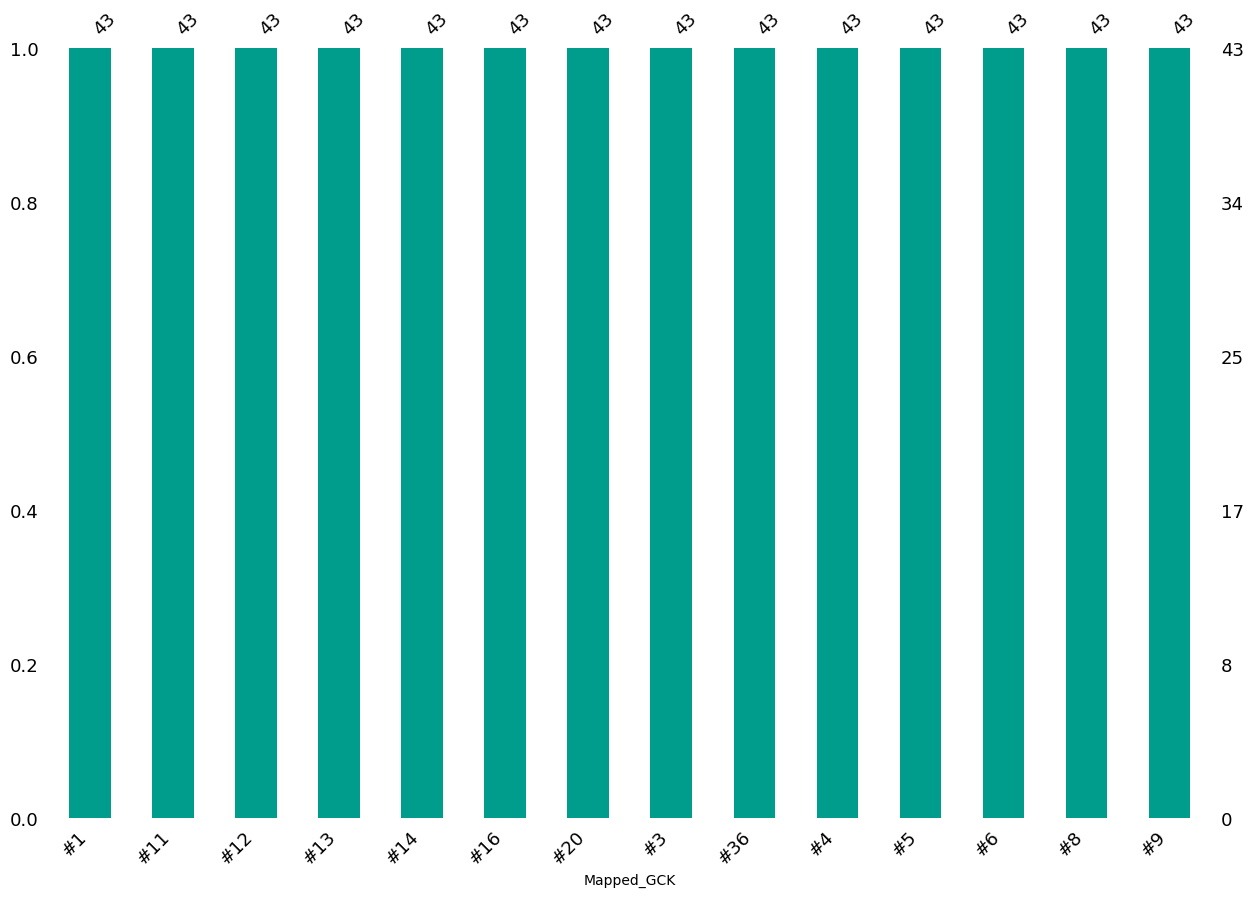

In [26]:
msno.bar(pivoted_data, figsize=(15,10), fontsize=13, 
         color=f.main_color, sort="ascending")

**Market Data**

In [27]:
market_data.isna().sum()

CHI Production Index                0
CHI Shipments Index                 0
FRA Production Index                0
FRA Shipments Index                 0
GER Production Index                0
GER Shipments Index                 0
ITA Production Index                0
ITA Shipments Index                 0
JAP Production Index                0
JAP Shipments Index                 0
SWI Production Index                1
SWI Shipments Index                 1
UK Production Index                 0
UK Shipments Index                 18
USA Production Index                0
USA Shipments Index                 1
Europe Production Index             0
Europe Shipments Index              0
(W) Price of Base Metals            0
(W) Price of Energy                 0
(W) Price of Metals & Minerals      0
(W) Price of Natural gas index      0
(W) Price of Crude oil, average     0
(W) Price of Copper                 0
USA EUR to LCU Conversion Rate      0
USA EE Production Prices            0
UK EE Produc

In [28]:
f.missing_value_summary(market_data)

,Unique Values,NaN Values,Percentage NaN
SWI Production Index,218,1,0.456621
SWI Shipments Index,218,1,0.456621
UK Shipments Index,201,18,8.219178
USA Shipments Index,218,1,0.456621
UK EE Production Prices,131,18,8.219178
FRA EE Production Prices,79,35,15.981735
CHI EE Production Prices,196,23,10.502283
SWI Machinery & Equipment Index,202,1,0.456621
(W) EE Production Index,208,11,5.022831
SWI EE Production Index,201,1,0.456621


<br>

`Missingno` Bar Plot

<Axes: >

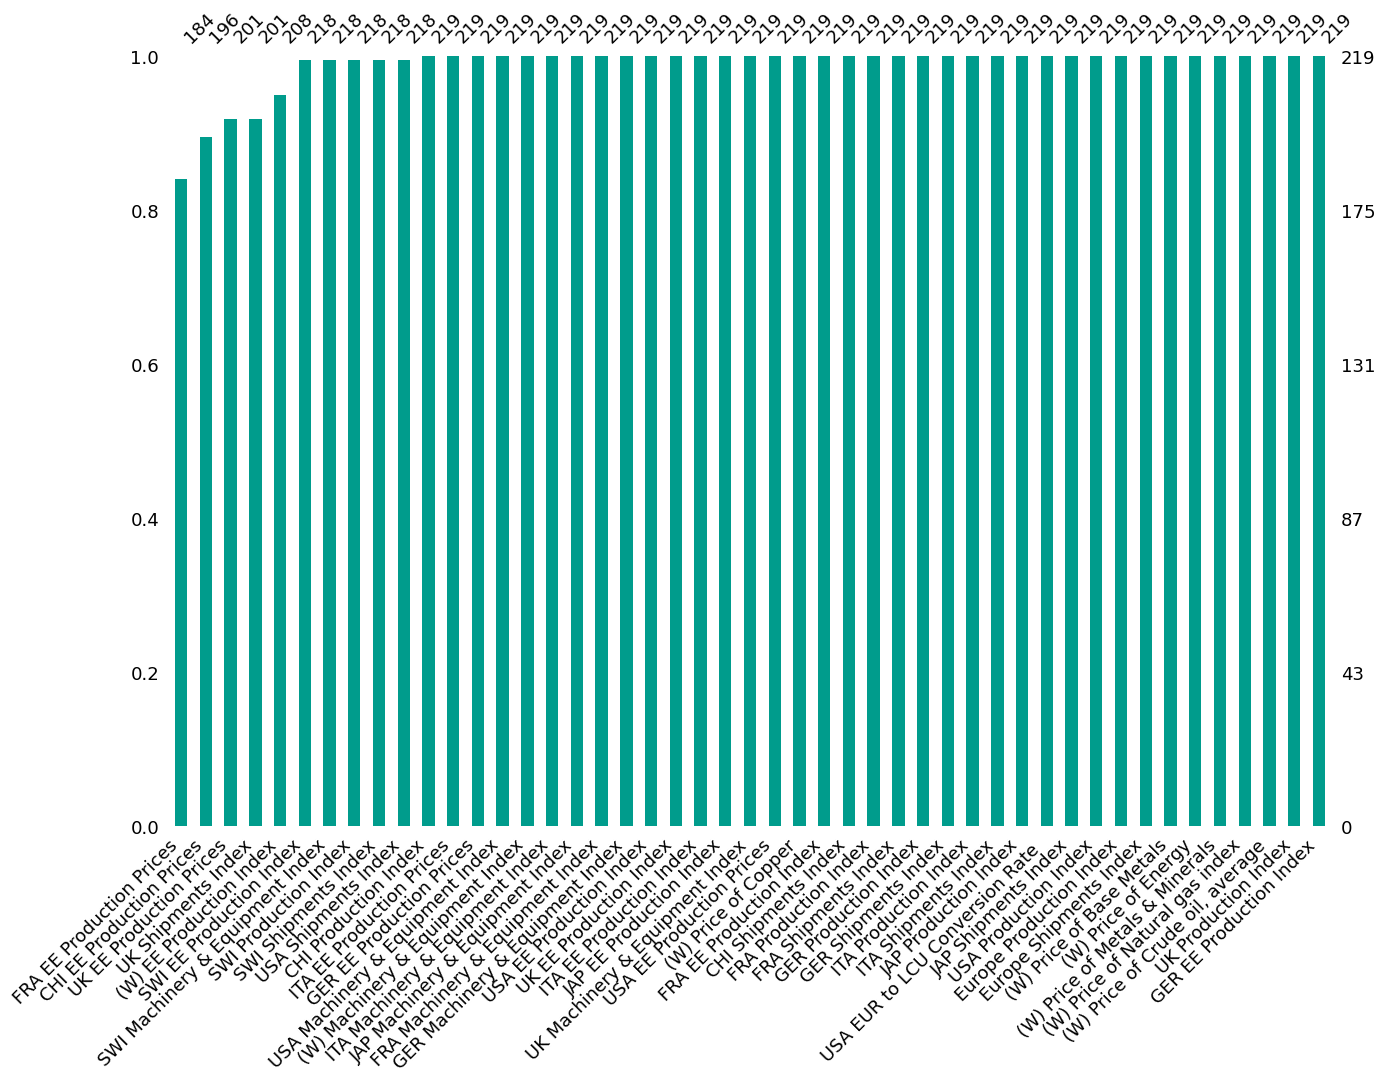

In [29]:
msno.bar(market_data, figsize=(15,10), fontsize=13, 
         color=f.main_color, sort="ascending")

In [30]:
missing_rows = market_data[market_data.isna().any(axis=1)]

In [31]:
for index, row in missing_rows.iterrows():
    missing_cols = row[row.isna()].index.tolist()
    print(f"Row {index} has missing values in the columns: {missing_cols}")

Row 2004-02 has missing values in the columns: ['FRA EE Production Prices', 'CHI EE Production Prices', '(W) EE Production Index']
Row 2004-03 has missing values in the columns: ['FRA EE Production Prices', 'CHI EE Production Prices', '(W) EE Production Index']
Row 2004-04 has missing values in the columns: ['FRA EE Production Prices', 'CHI EE Production Prices', '(W) EE Production Index']
Row 2004-05 has missing values in the columns: ['FRA EE Production Prices', 'CHI EE Production Prices', '(W) EE Production Index']
Row 2004-06 has missing values in the columns: ['FRA EE Production Prices', 'CHI EE Production Prices', '(W) EE Production Index']
Row 2004-07 has missing values in the columns: ['FRA EE Production Prices', 'CHI EE Production Prices', '(W) EE Production Index']
Row 2004-08 has missing values in the columns: ['FRA EE Production Prices', 'CHI EE Production Prices', '(W) EE Production Index']
Row 2004-09 has missing values in the columns: ['FRA EE Production Prices', 'CHI EE

## 5.3 Statistical Tests

<div class="alert-danger">

REMOVER DEPOIS

In [32]:
market_data.fillna(0, inplace = True)

### Sales Data

**Augmented Dickey-Fuller Test for Stationarity**

In [33]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

In [34]:
def adf_test_all_columns(df):
    results = {}
    for col in df.select_dtypes(include=[np.number]).columns:  
        result = adfuller(df[col], autolag='AIC')
        rounded_crit_values = {key: round(value, 3) for key, value in result[4].items()}  # Round to 3 decimals
        results[col] = {
            "ADF Statistic": result[0],
            "p-value": result[1],
            "Critical Values": rounded_crit_values,
            "Stationary": "Yes" if result[1] < 0.05 else "No"
        }
    
    return pd.DataFrame(results).T


In [35]:
adf_results = adf_test_all_columns(pivoted_data)
adf_results

,ADF Statistic,p-value,Critical Values,Stationary
#1,-6.002443,0.0,"{'1%': -3.597, '5%': -2.933, '10%': -2.605}",Yes
#11,-5.577923,0.000001,"{'1%': -3.601, '5%': -2.935, '10%': -2.606}",Yes
#12,-3.869337,0.002272,"{'1%': -3.597, '5%': -2.933, '10%': -2.605}",Yes
#13,-3.254199,0.017054,"{'1%': -3.606, '5%': -2.937, '10%': -2.607}",Yes
#14,-6.871822,0.0,"{'1%': -3.597, '5%': -2.933, '10%': -2.605}",Yes
#16,-6.367204,0.0,"{'1%': -3.646, '5%': -2.954, '10%': -2.616}",Yes
#20,-3.125179,0.024745,"{'1%': -3.601, '5%': -2.935, '10%': -2.606}",Yes
#3,-6.590291,0.0,"{'1%': -3.597, '5%': -2.933, '10%': -2.605}",Yes
#36,-7.000027,0.0,"{'1%': -3.597, '5%': -2.933, '10%': -2.605}",Yes
#4,-5.319293,0.000005,"{'1%': -3.597, '5%': -2.933, '10%': -2.605}",Yes


**Granger Causality Test**

In [36]:
from statsmodels.tsa.stattools import grangercausalitytests

In [38]:
def granger_causality_test(data, target_column, max_lag=4, threshold=0.05):
    """
    Performs Granger Causality Test for every column in the dataset with respect to a target column.
    
    Parameters:
    - data: DataFrame containing the time series data.
    - target_column: The column to test Granger causality against.
    - max_lag: The maximum lag to consider for the test (default is 4).
    - threshold: The p-value threshold to classify causality ("Yes" or "No").
    
    Returns:
    - DataFrame: A DataFrame with Granger causality results for each column.
    """
    granger_results = {}

    for column in data.columns:
        if column != target_column:
            # Perform Granger causality test between column and target column
            test_result = grangercausalitytests(data[[column, target_column]], max_lag, verbose=False)

            # Initialize dictionary to store results ("Yes" or "No" based on p-value)
            causality_results = {}

            # Loop over the lags and check p-value
            for lag, test_results in test_result.items():
                # Access p-value for the SSR chi-square test (or another test)
                p_value = test_results[0]['ssr_chi2test'][1]  # Extract p-value from the chi-squared test
                
                # If p-value is below threshold, store "Yes", else "No"
                causality_results[lag] = "Yes" if p_value < threshold else "No"
            
            # Store the results for the current column
            granger_results[column] = causality_results

    # Convert the results to a DataFrame for easier interpretation
    granger_df = pd.DataFrame(granger_results)

    return granger_df

In [43]:
granger_results_dict = {}

for col in pivoted_data.columns:
    granger_results_dict[col] = granger_causality_test(pivoted_data, target_column=col)

In [46]:
granger_results_dict['#3']

,#1,#11,#12,#13,#14,#16,#20,#36,#4,#5,#6,#8,#9
1,Yes,No,No,No,No,No,No,No,Yes,No,No,No,Yes
2,No,No,No,No,No,No,Yes,No,Yes,No,Yes,No,No
3,No,No,No,No,No,No,Yes,Yes,Yes,No,No,No,No
4,No,No,No,No,No,No,Yes,Yes,Yes,No,No,No,No


*"Yes" means that there is evidence of Granger causality, which indicates that the past values of the predictor (the column being tested) help to predict the target variable.*

<div class="alert-info">
    
- heteroskedasticity - ARCH, Breusch-Pagan Test
- Autocorrelation and Partial Autocorrelation - ACF/PACF plots
- Seasonality Decomposition - STL

**Breusch-Pagan Test for Heteroskedasticity**

- acho que tem que ser feito depois pq já requer um target

In [47]:
import statsmodels.api as sm
import statsmodels.stats.api as sms

**Autocorrelation and Partial Autocorrelation**

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [56]:
def plot_acf_pacf_for_columns(data, lags=10):
    # Determine the number of rows and columns for subplots
    num_columns = len(data.columns)
    num_rows = num_columns  # One row for each column

    # Create a figure with subplots: 2 subplots per column (ACF and PACF)
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 6))
    
    # Loop through each column and plot ACF and PACF
    for idx, column in enumerate(data.columns):
        # Plot ACF
        plot_acf(data[column], lags=lags, ax=axes[idx, 0])
        axes[idx, 0].set_title(f'ACF for {column}')
        
        # Plot PACF
        plot_pacf(data[column], lags=lags, ax=axes[idx, 1])
        axes[idx, 1].set_title(f'PACF for {column}')
    
    # Adjust layout to avoid overlap and display the plots
    plt.tight_layout()
    plt.show()

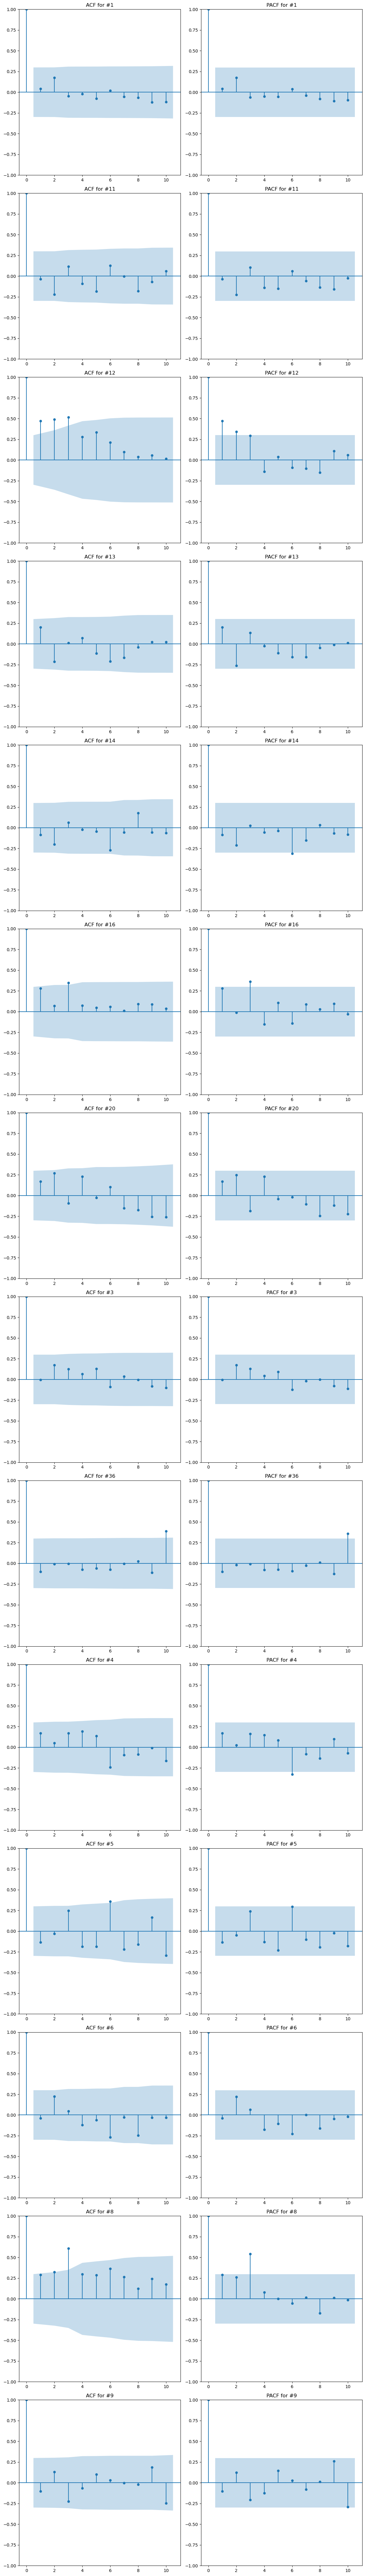

In [57]:
plot_acf_pacf_for_columns(pivoted_data, lags=10)

## 5.4 Feature Engineering

<a href="#top">Top &#129033;</a>

**Sales Data**

**Market Data**

## 5.5 Outliers

**Sales Data**

**Market Data**